Problem Statement:
----------------------------
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know: 
 - Which variables are significant in predicting the price of a car.
 - How well those variables describe the price of a car.
 - Predicted price of cars with the available independent variables.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
# Importing Housing.csv
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# Looking at the first five rows
pd.set_option('display.max_columns', 40)
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car_df.shape

(205, 26)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Some data cleaning/correctios are required on Categorical variables before we viasualise Categorical variable with Price.
 - Correct the Car Model Names in CarName variable
 - Correct the typo in drivewheel variable
 - Extract only the Car Model Name in CarName variable

In [11]:
def def_name(x):
    if   ((x == 'vw') or (x == 'vokswagen')):
        return "volkswagen"
    elif x == 'Nissan':
        return "nissan"
    elif x == 'toyouta':
        return "toyota"
    elif x == 'porcshce':
        return "porsche"
    elif x == 'maxda':
        return "mazda"
    else:
        return x

In [12]:
car_df['CarName'] = car_df['CarName'].apply(def_name)

In [13]:
car_df['CarName'] = car_df.CarName.str.split(' ').str[0]

In [14]:
print(car_df['cylindernumber'].value_counts())
print(car_df['doornumber'].value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64


In [15]:
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})
# Applying the function to the two columns
car_df[['cylindernumber', 'doornumber']] = car_df[['cylindernumber', 'doornumber']].apply(num_map)

In [16]:
#Average Miliege - - Combine citympg & highwaympg into one variable by taking average of two as Average Miliege.
car_df['avgmiliege'] = ((car_df['citympg'] + car_df['highwaympg'])/2).astype('int')

In [17]:
# Drop the 'car_ID' column
car_df.drop(['citympg','highwaympg'], axis = 1, inplace = True)

In [18]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmiliege
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20


## Step 2: Visualising the Data. (Univariate an Bivariate Analysis)
*********************************************************************************

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

#### Split the car_df into two part for visualising Numerical variables to get someinsights. 

In [19]:
col_num = []
col_cat = []
for col in list(car_df.columns):     
    if (car_df[col].dtype) == 'O':
        col_cat.append(col)
    else:
        col_num.append(col)

In [20]:
col_num.pop(0)

'car_ID'

In [21]:
# Correlation matrix
cor = car_df[col_num].corr()
cor

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmiliege
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,0.001510
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,0.031835,-0.029731
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,-0.514574
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,-0.695307
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,-0.667332
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,-0.083091
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,-0.785521
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,0.718305,-0.458071
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,-0.667950
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.588604


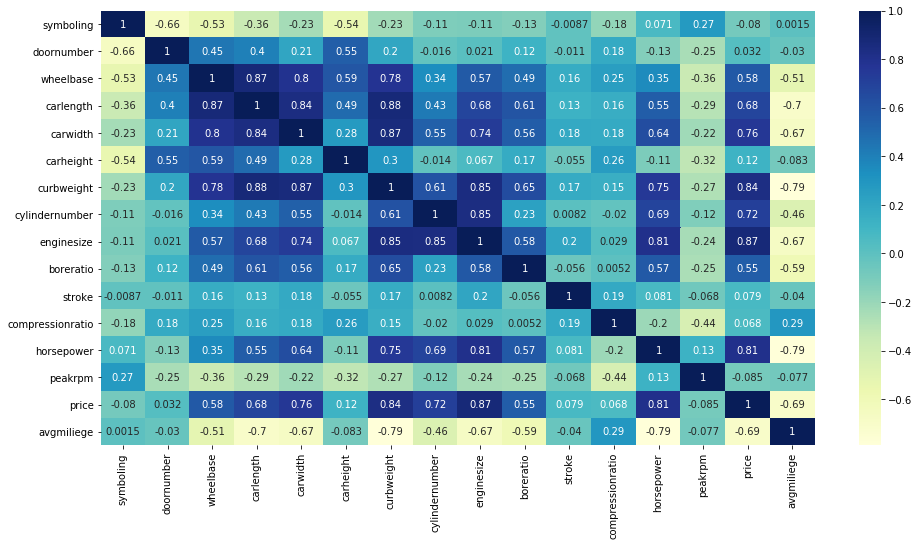

In [22]:
# Heatmap.
# Figure size
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Observations from above two pair plots are:

#### 1.Car Price is nicely associated with some predictor variables like 
-  carlength
-  carwidth
-  enginesize
-  horsepower
-  curbweight
-  wheelbase

#### 2.Car Price is weakly associated with some predictor variables like 
-  stroke
-  compressionratio
-  peakrpm
-  carheight

#### 3.Strong multicollinearity/correlation exists between citympg and highwaympg predictor variables about 84%.

#### 4.Strong multicollinearity/correlation exists between curbweight and some predictor variables like 
-  carlength
-  carwidth
-  wheelbase
-  borerratio

#### 5.Predictor variable compressionratio is weakly associated/correlated with all of the predictor variables.

#### 6. Inverse Correlation exists between Car Price and  
-  citympg
-  peakrpm
-  symboling

#### Visualizing the Price variable in the Dataset.

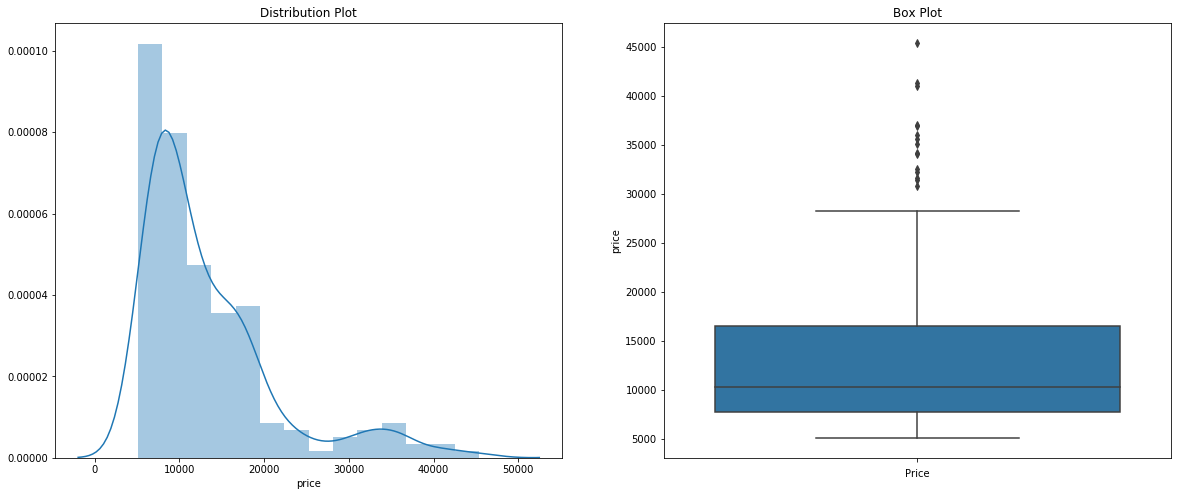

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Distribution Plot')
sns.distplot(car_df.price)
plt.subplot(1,2,2)
plt.title('Box Plot')
sns.boxplot(y=car_df.price)
plt.xlabel('Price')
plt.show()

In [24]:
car_df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### Observations from above visualisation on car price variable:
1. The plot is right-skewed and most of the car proces are below 16000.
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points sprreadout form mean, which indicates a high variance in the car prices.
4. 75% of the prices are below 16,500 whereas the remaining 25% are between 16,500 and 45,400.



#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's visualize some of these variables.

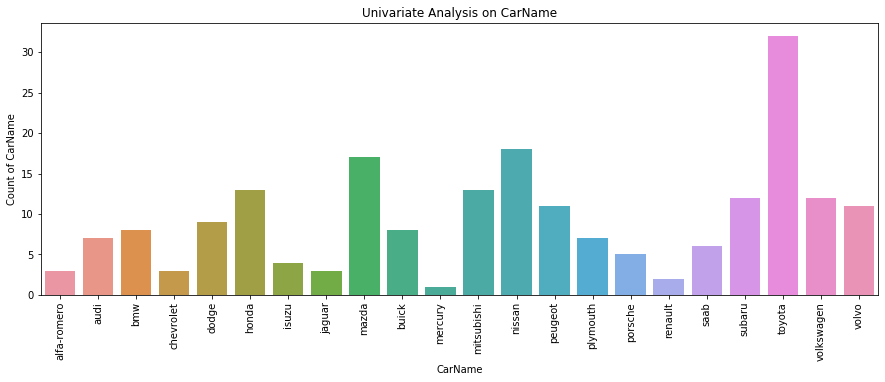

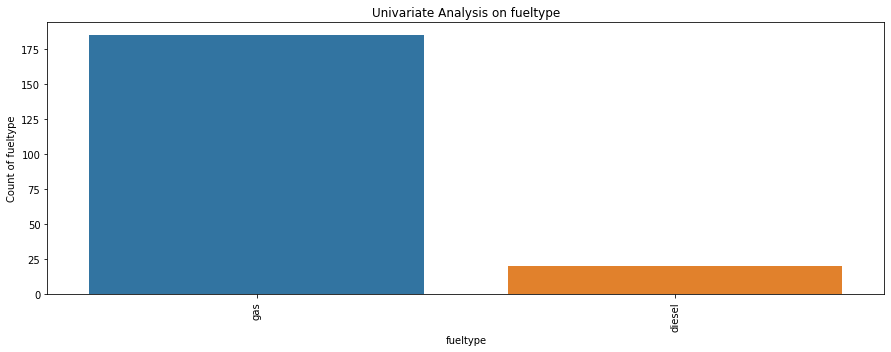

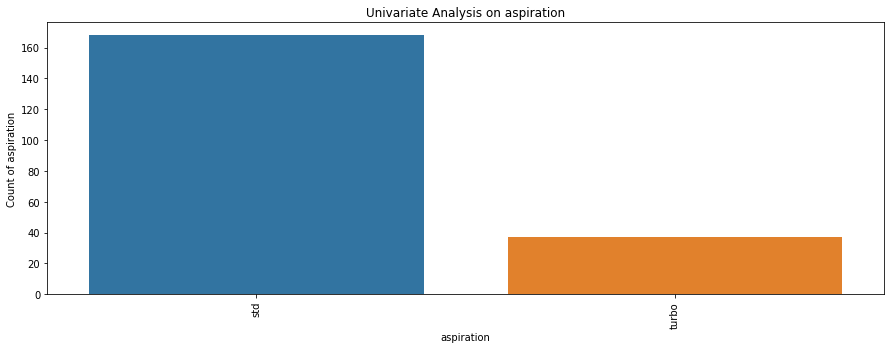

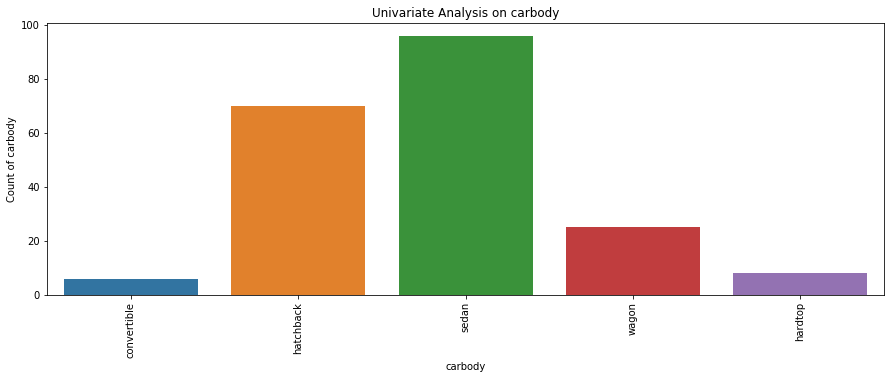

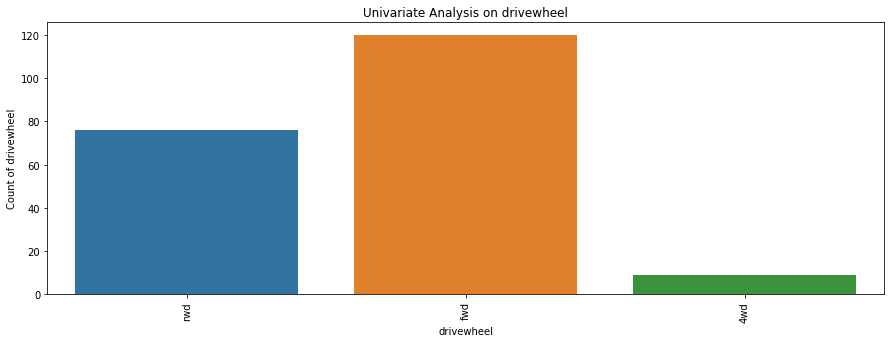

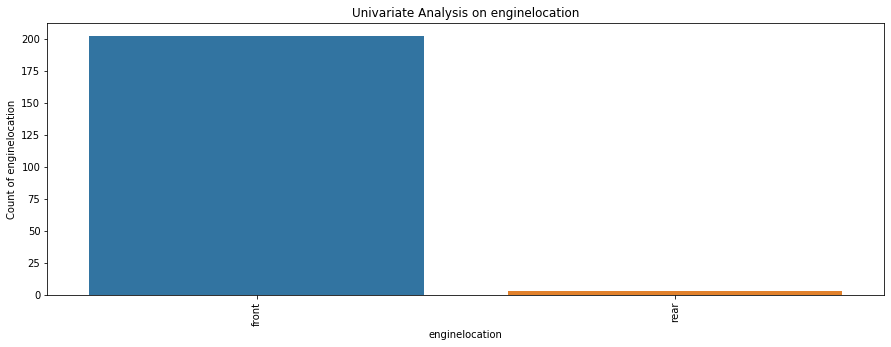

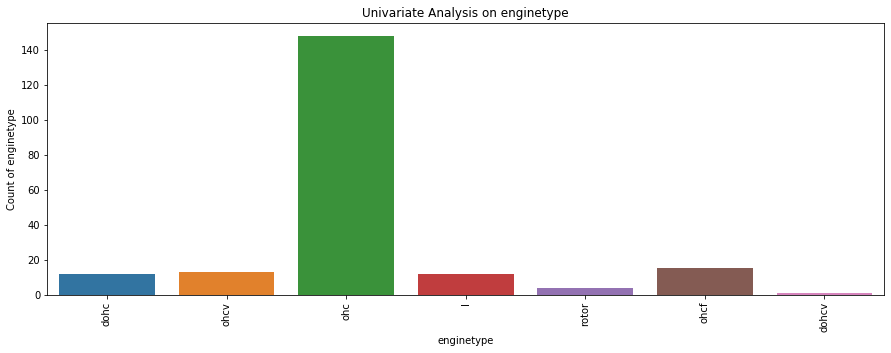

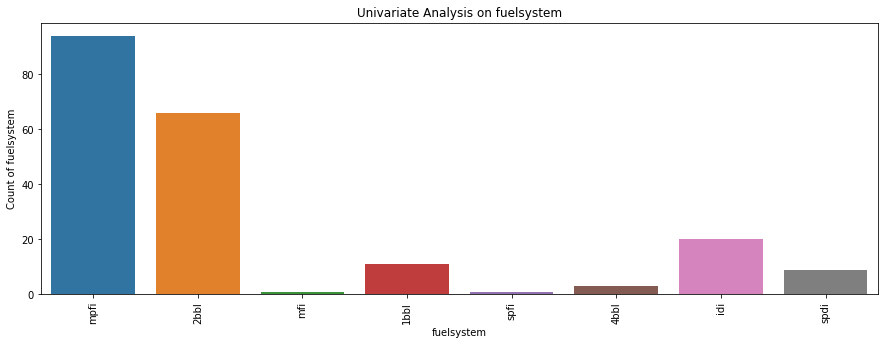

In [25]:
for fet in col_cat:
    fig, axs = plt.subplots(figsize = (15,5))
    sns.countplot(car_df[fet], data = car_df)
    plt.xlabel(fet)
    plt.ylabel('Count of {}'.format(fet))
    plt.title('Univariate Analysis on {}'.format(fet))
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

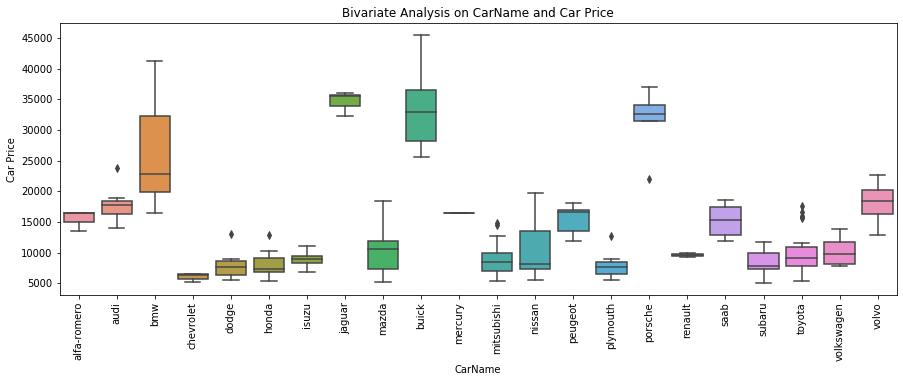

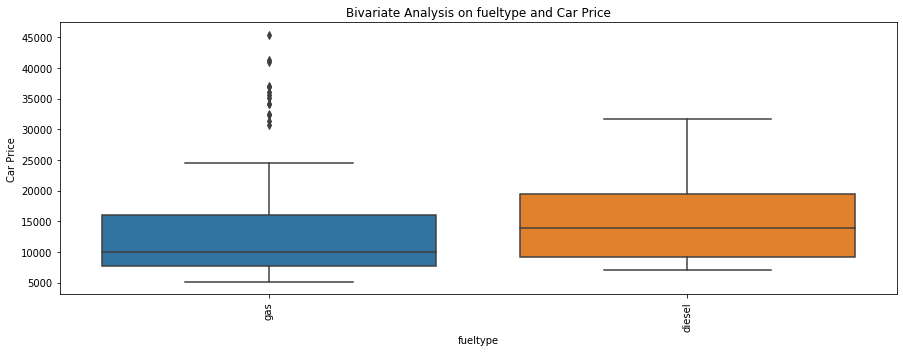

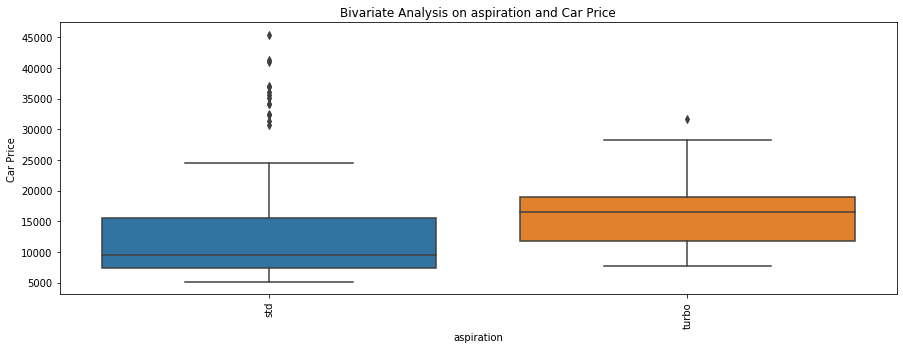

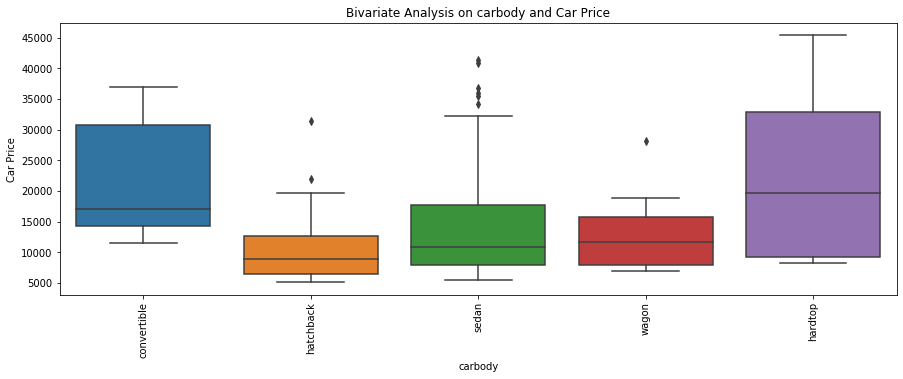

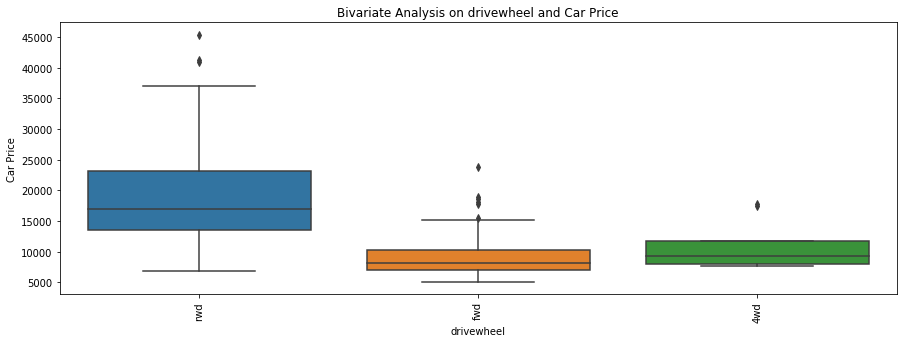

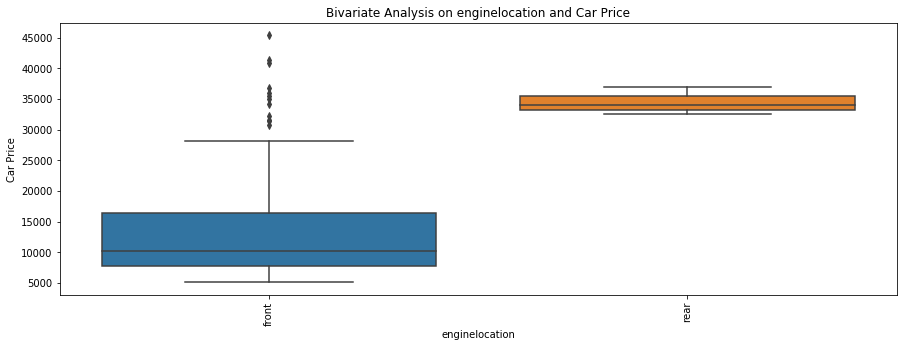

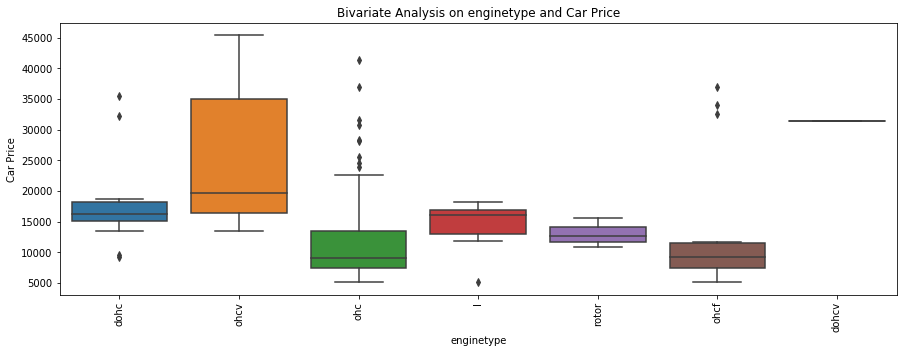

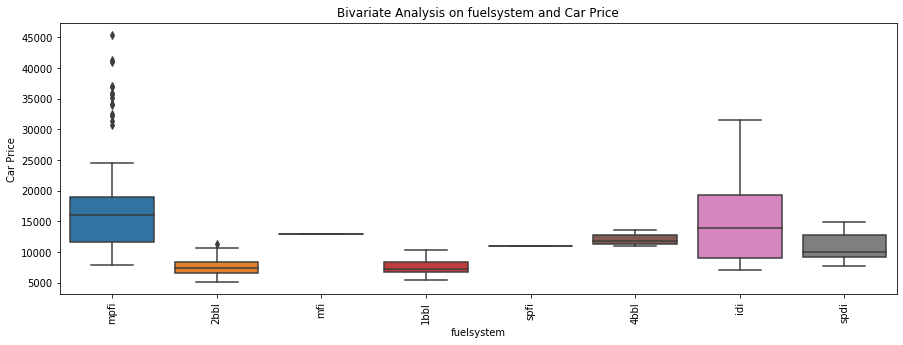

In [26]:
for fet in col_cat:
    fig, axs = plt.subplots(figsize = (15,5))
    sns.boxplot(x=car_df[fet],y=car_df["price"])
    plt.xlabel(fet)
    plt.ylabel('Car Price')
    plt.title('Bivariate Analysis on {} and Car Price'.format(fet))
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

#### Observations from above Plots:
 - Car Price is more for bmw,audi,jaguar,buick,porsche.
 - Gasoline cars are more prefered over Diesel and Diesel cars are more priced than gasoline cars.
 - Car type Sedan is more prefered over other car types like hatchback/hardtop as they ar epriced more.
 - Cars with aspiration std are most sold since cars with aspiration as turbo are more priced.
 - Cars with Engine Type OHC are most sold since all other types are more priced.
 - Cars with Drivewheel fwd are most sold. 
 - Cars with Engine Location front are most sold since cars rear engine are more priced.
 - Cars with fulesystem as mpfi are most sold since it seems to be the standard and all others are priced less.
 - Cars with range less than 10000 are sold most.

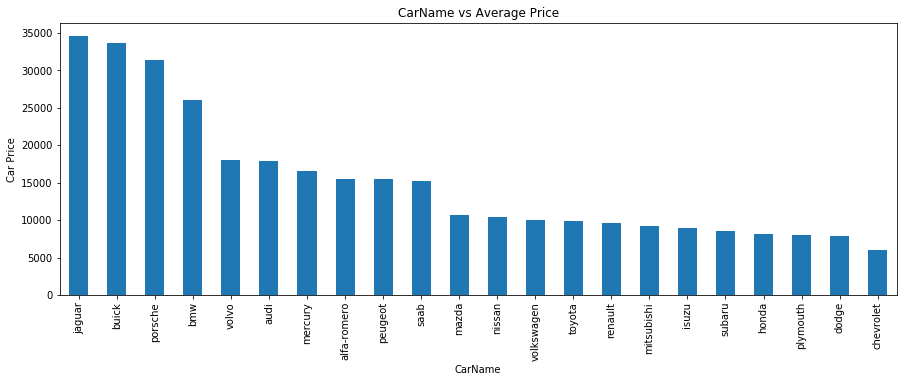

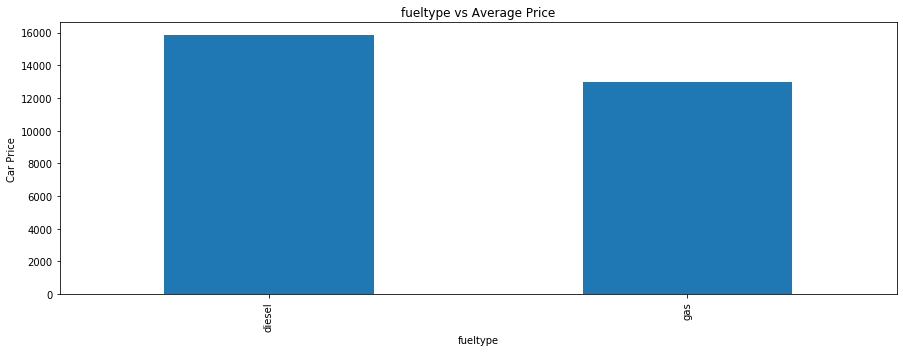

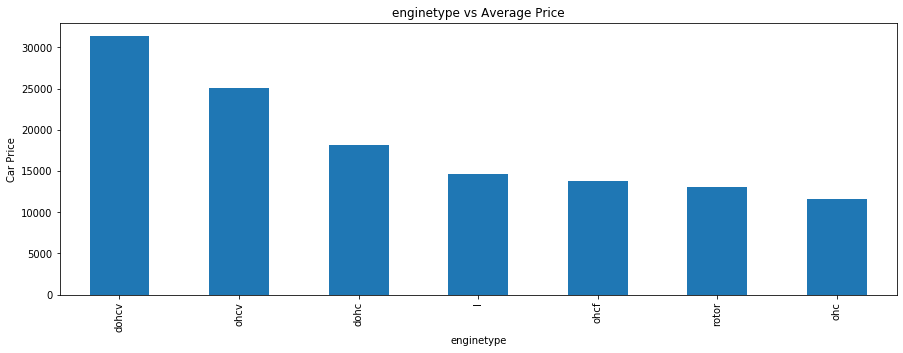

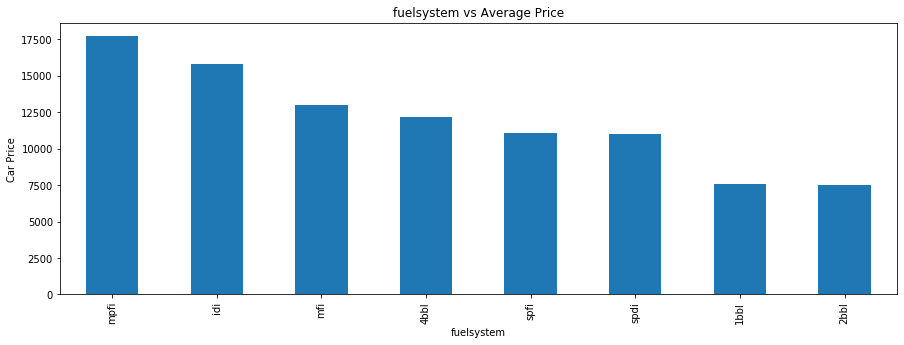

In [27]:
for fet in col_cat:
    if fet in ['CarName', 'fueltype','enginetype','fuelsystem','carsrange']:
        fig, axs = plt.subplots(figsize = (15,5))
        car_df.groupby(fet)['price'].mean().sort_values(ascending = False).plot.bar()
        plt.xlabel(fet)
        plt.ylabel('Car Price')
        plt.title('{} vs Average Price'.format(fet))
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()

#### Observations from above plots are:
 - Jaguar,Buick, Porsche & BMW seem to have highest average price.
 - Diesel has higher average price than gas.
 - Engine type dohcv/ohcv have higher average price.
 - Fuelsystem mpfi has highest average price.

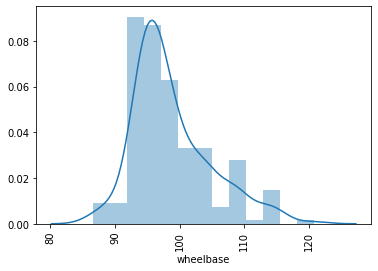

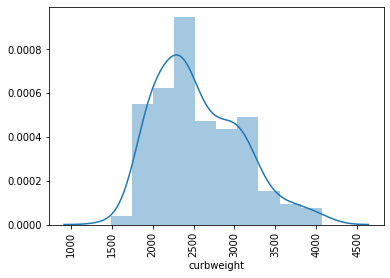

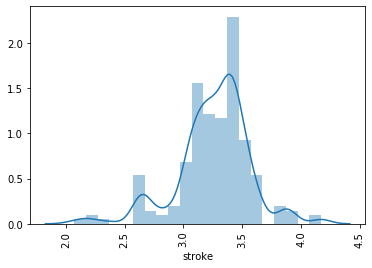

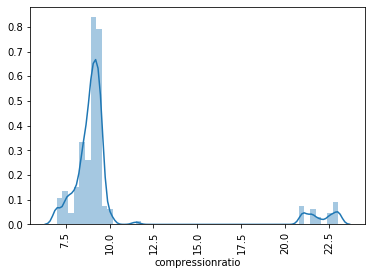

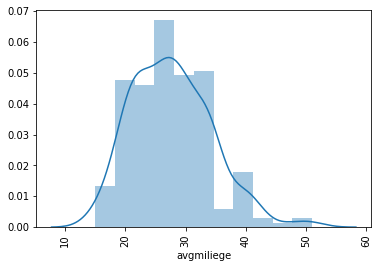

In [28]:
for fet in col_num:
    if fet in ['wheelbase', 'curbweight','stroke','compressionratio','avgmiliege']: 
        sns.distplot(car_df[fet])
        plt.xlabel(fet)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()

## 3. Data Preparation

#### Creating Dummy Variables - One Hot Encoding.

In [29]:
df_main = car_df.copy()
# Convert into dummies
cars_dum = pd.get_dummies(car_df[col_cat], drop_first=True)
# Drop categorical variable columns
car_df = car_df.drop((col_cat), axis=1)
# Concatenate dummy variables with X
car_df = pd.concat([car_df, cars_dum], axis=1)
# Let's check the first few rows
car_df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmiliege,CarName_audi,CarName_bmw,CarName_buick,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,13495.0,24,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,16500.0,24,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,16500.0,22,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,13950.0,27,1,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,17450.0,20,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [30]:
# Drop the 'car_ID' column
car_df.drop('car_ID', axis = 1, inplace = True)

In [31]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Normailse Numeric variables using MinMax Scaling.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[col_num] = scaler.fit_transform(df_train[col_num])

In [33]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmiliege,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,-0.700201,0.908353,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,1.151929,-0.722742,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,-0.452248,-0.129617,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,0.442646,-0.574461,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,0.757569,-1.315868,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [34]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmiliege,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,...,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,2.155230e-15,7.259151e-17,1.195625e-16,6.009179e-16,1.925422e-16,1.257735e-16,0.034965,0.041958,0.034965,0.020979,...,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,0.184337,0.201198,0.184337,0.143818,...,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,-3.403827e+00,-8.072216e-01,-1.378157e+00,-2.043565e+00,-1.020394e+00,-1.908993e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,-4.497569e-01,-3.841200e-01,-8.223718e-01,-6.882361e-01,-7.072706e-01,-8.710235e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,6.399437e-02,-2.783446e-01,-2.160603e-01,1.458127e-01,-3.674114e-01,-1.296166e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,4.814173e-01,-1.725692e-01,3.397252e-01,7.713493e-01,4.381475e-01,8.342124e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,2.953845e+00,3.423794e+00,4.684957e+00,3.064983e+00,3.632362e+00,3.429137e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# Split the train dataset into X and y
y_train = df_train.pop('price')
X_train = df_train

In [37]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,X_train,y_train,cv=5)
print(score)
print(score.mean())

[0.7806023  0.88647546 0.94703551 0.61117273 0.80157792]
0.8053727836990797


In [39]:
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 46),
 ('doornumber', False, 43),
 ('wheelbase', False, 31),
 ('carlength', False, 34),
 ('carwidth', True, 1),
 ('carheight', False, 32),
 ('curbweight', False, 22),
 ('cylindernumber', False, 37),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 38),
 ('compressionratio', False, 4),
 ('horsepower', False, 36),
 ('peakrpm', False, 27),
 ('avgmiliege', False, 25),
 ('CarName_audi', False, 14),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 39),
 ('CarName_chevrolet', False, 13),
 ('CarName_dodge', False, 11),
 ('CarName_honda', False, 9),
 ('CarName_isuzu', False, 24),
 ('CarName_jaguar', False, 33),
 ('CarName_mazda', False, 6),
 ('CarName_mercury', False, 47),
 ('CarName_mitsubishi', False, 5),
 ('CarName_nissan', False, 7),
 ('CarName_peugeot', True, 1),
 ('CarName_plymouth', False, 12),
 ('CarName_porsche', False, 16),
 ('CarName_renault', True, 1),
 ('CarName_saab', False, 29),
 ('CarName_subaru', True, 1),
 ('CarName_toyota', Fals

In [41]:
X_train.columns[rfe.support_]

Index(['carwidth', 'enginesize', 'CarName_bmw', 'CarName_peugeot',
       'CarName_renault', 'CarName_subaru', 'enginelocation_rear',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [42]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,enginesize,CarName_bmw,CarName_peugeot,CarName_renault,CarName_subaru,enginelocation_rear,enginetype_l,enginetype_ohcf,enginetype_rotor
122,-0.924500,-0.660242,0,0,0,0,0,0,0,0
125,1.114978,0.637806,0,0,0,0,0,0,0,0
166,-0.833856,-0.660242,0,0,0,0,0,0,0,0
1,-0.788535,0.123485,0,0,0,0,0,0,0,0
199,0.616439,0.123485,0,0,0,0,0,0,0,0


In [43]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

MODEL 1

In [44]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.98e-64
Time:                        21:57:52   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [45]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
6,CarName_subaru,inf
7,enginelocation_rear,inf
9,enginetype_ohcf,inf
4,CarName_peugeot,9.49
8,enginetype_l,8.95
2,enginesize,3.23
1,carwidth,3.17
0,const,1.31
10,enginetype_rotor,1.15
3,CarName_bmw,1.09


dropping CarName_subaru because of VIF is infinity.

MODEL 2

In [46]:
X_train_new = X_train_new.drop(["CarName_subaru"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.98e-64
Time:                        21:58:05   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

dropping enginetype_ohcf  because of high VIF value.

In [47]:
X_train_new = X_train_new.drop(["enginetype_ohcf"], axis = 1)

MODEL 3

In [48]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.22e-65
Time:                        21:58:10   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [49]:
checkVIF(X_train_new)

,Features,VIF
4,CarName_peugeot,9.49
7,enginetype_l,8.94
2,enginesize,3.20
1,carwidth,3.17
0,const,1.19
8,enginetype_rotor,1.14
3,CarName_bmw,1.09
6,enginelocation_rear,1.09
5,CarName_renault,1.01


MODEL 4

In [50]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["CarName_peugeot"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.49e-63
Time:                        21:58:15   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

,Features,VIF
2,enginesize,3.14
1,carwidth,2.91
0,const,1.19
7,enginetype_rotor,1.14
3,CarName_bmw,1.09
5,enginelocation_rear,1.09
6,enginetype_l,1.09
4,CarName_renault,1.00


MODEL 5

In [51]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["enginetype_l"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.92e-64
Time:                        21:58:42   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

,Features,VIF
2,enginesize,3.01
1,carwidth,2.68
6,enginetype_rotor,1.12
0,const,1.10
3,CarName_bmw,1.09
5,enginelocation_rear,1.08
4,CarName_renault,1.00


## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

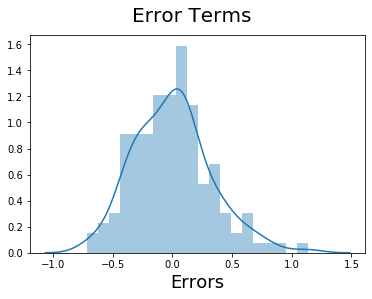

In [52]:
lm = sm.OLS(y_train,X_train_new).fit()
y_pred = lm.predict(X_train_new)
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

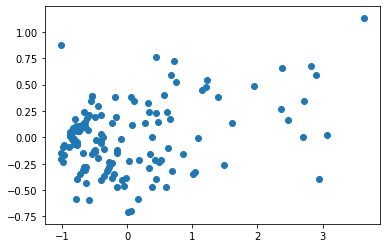

In [53]:
res = y_train - y_pred
plt.scatter(y_train,res)
plt.show()

Error terms are scattered allover without any pattern

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

In [54]:
#Scaling the test set
df_test[col_num] = scaler.transform(df_test[col_num])

In [55]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [56]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [57]:
# Making predictions
y_pred = lm.predict(X_test_new)

Evaluation of test via comparison of y_pred and y_test

In [58]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8997211435182687

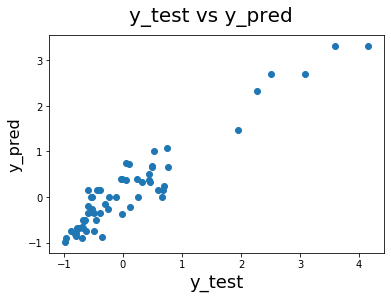

In [59]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Inferences:
 - R-sqaured and Adjusted R-squared (extent of fit) - 89% variance explained.
 - F-stats and Prob(F-stats) (overall model fit) - 205.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
 - p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

### Final Inferences on the Model:
Below are the variables that are affecting the car prices currently in America.
 - 1.Engine Size.
 - 2.Car Width.
 - 3.Engine Type Rotor.
 - 4.Engine location Rear.
 - 5.Car company BMW.
 - 6.Car company Renault.

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2662896228286988
MSE: 0.11602808557498791
RMSE: 0.34062895586691966


#### Trying other regression methods

In [139]:
# Drop the 'car_ID' column
car_dfx1 = df_main.copy()
cars_dum = pd.get_dummies(car_dfx1[col_cat], drop_first=True)
# Drop categorical variable columns
car_dfx1 = car_dfx1.drop((col_cat), axis=1)
# Concatenate dummy variables with X
car_dfx1 = pd.concat([car_dfx1, cars_dum], axis=1)
# Let's check the first few rows
car_dfx1.drop('car_ID', axis = 1, inplace = True)

In [140]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car_dfx1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[col_num] = scaler.fit_transform(df_train[col_num])

In [142]:
# Split the train dataset into X and y
y_train = df_train.pop('price')
X_train = df_train

In [143]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
0.867794521212615


In [144]:
df_test[col_num] = scaler.transform(df_test[col_num])

In [145]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [146]:
#Model Evaluation
prediction=ridge_regressor.predict(X_test)
from sklearn import metrics
print('R2:', metrics.r2_score(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2: 0.9170553164896217
MAE: 0.22545392471985454
MSE: 0.09597150559934578
RMSE: 0.3097926816426524


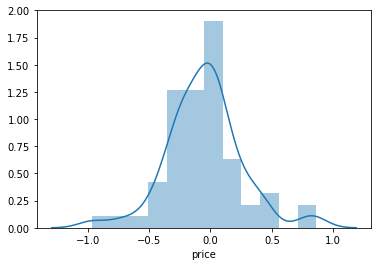

In [147]:
sns.distplot(y_test-prediction)

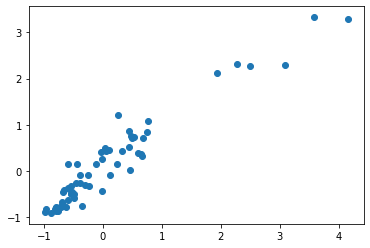

In [148]:
plt.scatter(y_test, prediction)

In [149]:
# Drop the 'car_ID' column
car_dfx1 = df_main.copy()
cars_dum = pd.get_dummies(car_dfx1[col_cat], drop_first=True)
# Drop categorical variable columns
car_dfx1 = car_dfx1.drop((col_cat), axis=1)
# Concatenate dummy variables with X
car_dfx1 = pd.concat([car_dfx1, cars_dum], axis=1)
# Let's check the first few rows
car_dfx1.drop('car_ID', axis = 1, inplace = True)

In [150]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(car_dfx1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[col_num] = scaler.fit_transform(df_train[col_num])

In [152]:
# Split the train dataset into X and y
y_train = df_train.pop('price')
X_train = df_train

In [153]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
0.8737026214806922


In [154]:
df_test[col_num] = scaler.transform(df_test[col_num])

In [155]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [156]:
#Model Evaluation
prediction=lasso_regressor.predict(X_test)
from sklearn import metrics
print('R2:', metrics.r2_score(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

R2: 0.9220833151108736
MAE: 0.21395291003668898
MSE: 0.09015383799955788
RMSE: 0.3002562871940534


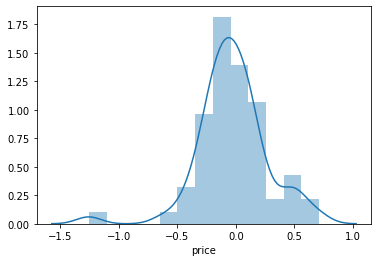

In [157]:
sns.distplot(y_test-prediction)

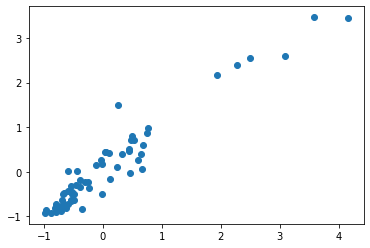

In [158]:
plt.scatter(y_test, prediction)

#### So out of these regression models Lasso has produced best accuracy of 92% with lowest RMSE of 0.3 on unseen data.